# Step1: Import all Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step2: Import the Dataset

In [2]:
def answer_one(): 
    import numpy as np
    import pandas as pd
    from sklearn.datasets import load_iris 
    cancer = load_iris()     
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)

df = answer_one()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# Step3: Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

# Step4: EDA 

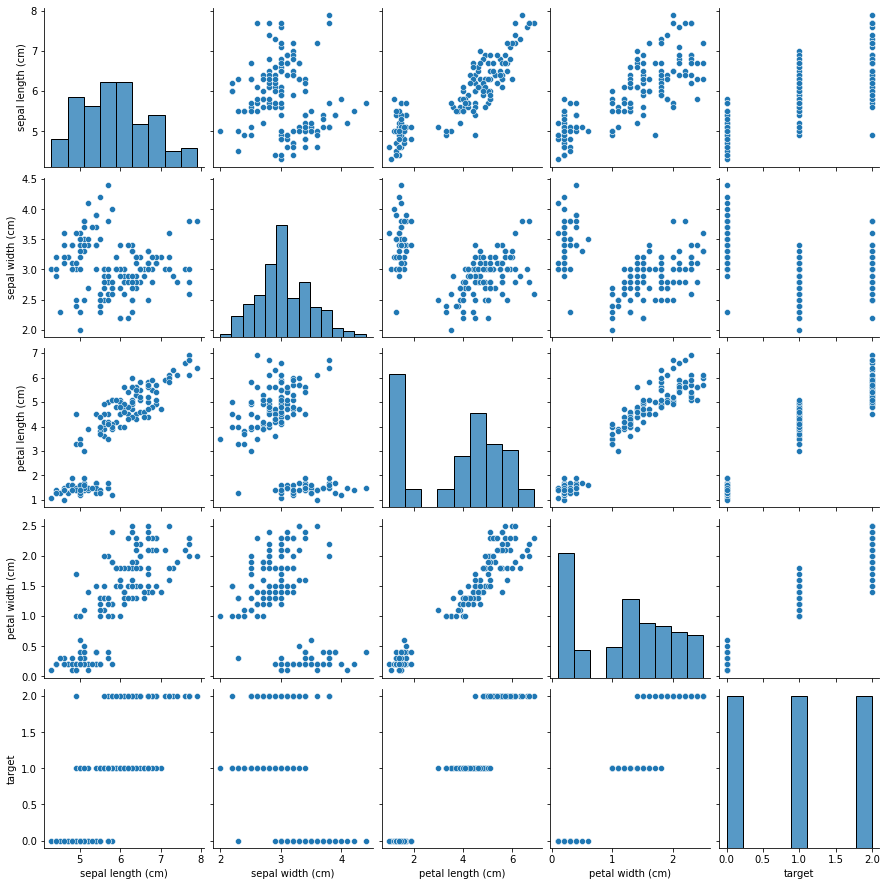

In [5]:
sns.pairplot(df)

# Step5: Determine the Features & Target Variable

In [6]:
X = df.drop("target", axis = 1)
y = df["target"]

# Step6: Split the Dataset to Train & Test set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=818)

# PART 01: Decision Trees

# Step7: Train the Model

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
DT_model = DecisionTreeClassifier()

In [11]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

# Step8: Predicting Test Data

In [12]:
y_pred= DT_model.predict(X_test)

# Step9: Evaluating the Model

## 🟣 Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 18]], dtype=int64)

### Classification Report

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.86      0.92      0.89        13
         2.0       0.95      0.90      0.92        20

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



# Step10: Print Feature Importance

In [16]:
DT_model.feature_importances_

array([0.        , 0.02153993, 0.03416635, 0.94429372])

In [17]:
pd.DataFrame(index=X.columns, data=DT_model.feature_importances_, columns=["Feature Importance"])

,Feature Importance
sepal length (cm),0.000000
sepal width (cm),0.021540
petal length (cm),0.034166
petal width (cm),0.944294


# Step11: Visualize the Tree

In [18]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

In [19]:
plt.figure(figsize=(14, 10))
#plot_tree(DT_model, filled=True, feature_names=X.columns)
tree.export_graphviz(DT_model.fit(X_train, y_train), special_characters=True)
plt.show()

<Figure size 1008x720 with 0 Axes>

# Step12: Understanding Hyperparameters

In [20]:
def report_DT_model(DT_model):
    DT_model_preds= DT_model.predict(X_test)
    print(classification_report(y_test, DT_model_preds))
    print('\n')
    plt.figure(figsize=(14, 10))
    plot_tree(DT_model, filled=True, feature_names=X.columns);

## 🟣 Max Depth

In [21]:
pruned_tree_Mdep = DecisionTreeClassifier(max_depth=2)
pruned_tree_Mdep.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [22]:
y_pred_Mdep = pruned_tree_Mdep.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
confusion_matrix(y_test, y_pred_Mdep)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  3, 17]], dtype=int64)

### Classification Report

In [25]:
print(classification_report(y_test, y_pred_Mdep))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.80      0.92      0.86        13
         2.0       0.94      0.85      0.89        20

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.92        45
weighted avg       0.92      0.91      0.91        45



### Plot Tree

In [26]:
from sklearn.tree import plot_tree

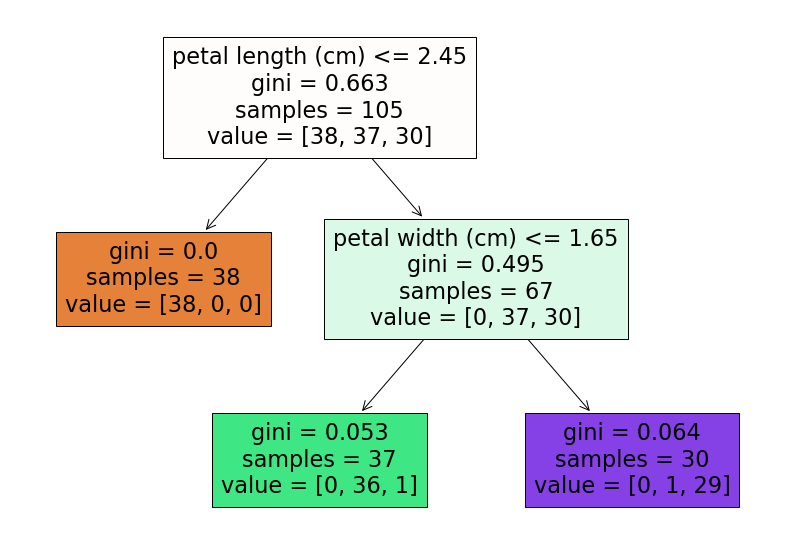

In [27]:
plt.figure(figsize=(14, 10))
plot_tree(pruned_tree_Mdep, filled=True, feature_names=X.columns)
plt.show()

## 🟣 Max Leaf Nodes

In [28]:
pruned_tree_Mleaf = DecisionTreeClassifier(max_leaf_nodes=4)
pruned_tree_Mleaf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

In [29]:
y_pred_Mleaf = pruned_tree_Mleaf.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred_Mleaf)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 18]], dtype=int64)

### Classification Report

In [31]:
print(classification_report(y_test, y_pred_Mleaf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.86      0.92      0.89        13
         2.0       0.95      0.90      0.92        20

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



### Plot Tree

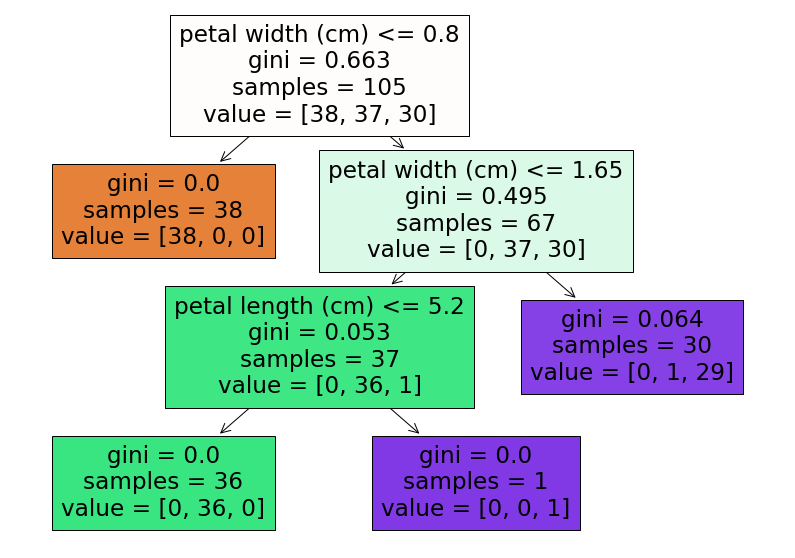

In [32]:
plt.figure(figsize=(14, 10))
plot_tree(pruned_tree_Mleaf, filled=True, feature_names=X.columns)
plt.show()

## 🟣 Criterion

In [33]:
pruned_tree_Criterion = DecisionTreeClassifier(criterion = "entropy")
pruned_tree_Criterion.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
y_pred_Criterion = pruned_tree_Criterion.predict(X_test)

In [35]:
confusion_matrix(y_test, y_pred_Criterion)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 18]], dtype=int64)

### Classification Report

In [36]:
print(classification_report(y_test, y_pred_Criterion))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.86      0.92      0.89        13
         2.0       0.95      0.90      0.92        20

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



### Plot Tree

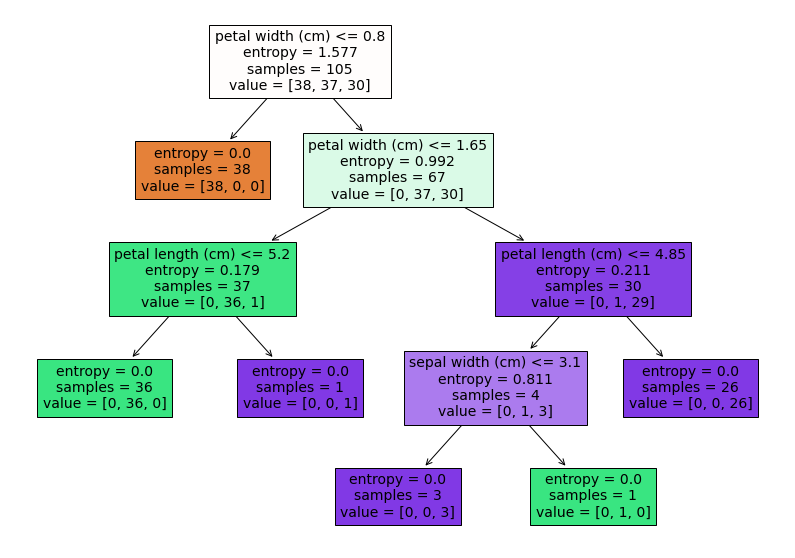

In [37]:
plt.figure(figsize=(14, 10))
plot_tree(pruned_tree_Criterion, filled=True, feature_names=X.columns)
plt.show()

# PART 02: Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Step13: Train the Model

In [39]:
Random_Forest = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=818)

In [40]:
Random_Forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=818)

# Step14: Predicting Test Data

In [41]:
y_pred_Random_Forest = Random_Forest.predict(X_test)

# Step15: Evaluating the Model

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

## 🟣 Confusion Matrix

In [43]:
confusion_matrix(y_test, y_pred_Random_Forest)

array([[12,  0,  0],
       [ 0,  9,  4],
       [ 0,  0, 20]], dtype=int64)

### Classification Report

In [44]:
print(classification_report(y_test, y_pred_Random_Forest))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      0.69      0.82        13
         2.0       0.83      1.00      0.91        20

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



# Step16: Print Feature Importance

In [45]:
Random_Forest.feature_importances_

array([0.12350211, 0.02990304, 0.52489994, 0.32169491])

# Step17: Grid Search

## Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
n_estimators=[64,80,118,154]
max_features= [2,3,4]
bootstrap = [True]
oob_score = [True]

In [48]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [49]:
random_FC = RandomForestClassifier()
Grid_search_M = GridSearchCV(random_FC,param_grid)

In [50]:
Grid_search_M.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 80, 118, 154],
                         'oob_score': [True]})

In [51]:
Grid_search_M.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

## Predict

In [52]:
GS_pred = Grid_search_M.predict(X_test)

##  Confusion Matrix

In [53]:
confusion_matrix(y_test, GS_pred)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 18]], dtype=int64)

## Classification Report

In [54]:
print(classification_report(y_test,GS_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.86      0.92      0.89        13
         2.0       0.95      0.90      0.92        20

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



## OOB.oob_score

In [55]:
Grid_search_M.best_estimator_.oob_score

True

In [56]:
Grid_search_M.best_estimator_.oob_score_

0.9619047619047619

## OOB Error

In [57]:
OOB_Error = 1 - (Grid_search_M.best_estimator_.oob_score_)
OOB_Error

0.03809523809523807

# PART 03: K-Means Clustering

In [58]:
#Scaling the Featues

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler= StandardScaler()

In [61]:
scaled_X= scaler.fit_transform(X)
scaled_X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# Step18: Creating and Fitting a KMeans Model

In [62]:
from sklearn.cluster import KMeans

In [63]:
K_Means_model = KMeans(n_clusters=8)

In [64]:
cluster_labels= K_Means_model.fit_predict(scaled_X)
cluster_labels

array([3, 1, 1, 1, 3, 6, 3, 3, 1, 1, 3, 3, 1, 1, 6, 6, 6, 3, 6, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 6, 6, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 3, 4, 4, 4, 2, 5, 5, 4, 2, 5, 2, 2, 5, 2, 5, 5, 4,
       5, 2, 2, 2, 4, 5, 5, 5, 5, 5, 5, 4, 5, 2, 2, 2, 2, 5, 5, 4, 4, 2,
       5, 2, 2, 5, 2, 2, 2, 5, 5, 5, 2, 5, 4, 5, 0, 5, 4, 0, 2, 0, 5, 7,
       4, 5, 4, 5, 5, 4, 4, 7, 0, 2, 4, 5, 0, 5, 4, 0, 5, 5, 4, 0, 0, 7,
       4, 5, 5, 0, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 5])

# Step19: Choosing K Value

In [65]:
SSD= []

for k in range (2, 10):
    K_Means_model=KMeans(n_clusters=k)
    
    K_Means_model.fit(scaled_X)
    
    SSD.append(K_Means_model.inertia_)

In [66]:
SSD

[222.36170496502302,
 139.82049635974974,
 114.09254690403094,
 90.87917021812927,
 79.99886651431585,
 71.03343108154418,
 62.85172292390485,
 55.24499621462773]

## 🟣 Plot--> K Value, Sum of Squared Distances

Text(0, 0.5, 'Sum of Squared Distances')

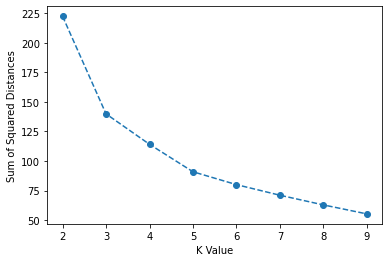

In [67]:
plt.plot(range(2,10), SSD, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')

## What's your choice?
<hr>

Answer: 

## As this is unsupervised learning, there is no 100% correct answer here. But, I choose K=5, because after that we observe the diagram slope is getting less decrease. At this point we need an expert to help us for better choise.


# PART 04: Principal Component Analysis(PCA)

# Step20: Build the model

In [68]:
from sklearn.decomposition import PCA

In [69]:
PCA_model = PCA(n_components=2)

In [70]:
principal_components = PCA_model.fit_transform(scaled_X)

## Plot

Text(0, 0.5, 'Second Principal Component')

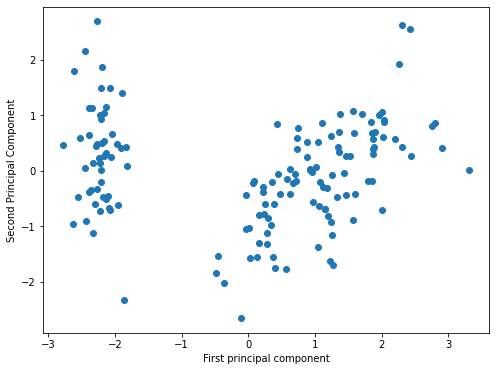

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Step21: Model Components

In [72]:
PCA_model.n_components

2

In [73]:
PCA_model.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

## We can visualize this relationship with a heatmap:

In [74]:
PCA_df_comp = pd.DataFrame(PCA_model.components_, index=['PC1','PC2'] ,columns=X.columns)
PCA_df_comp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942


<AxesSubplot:>

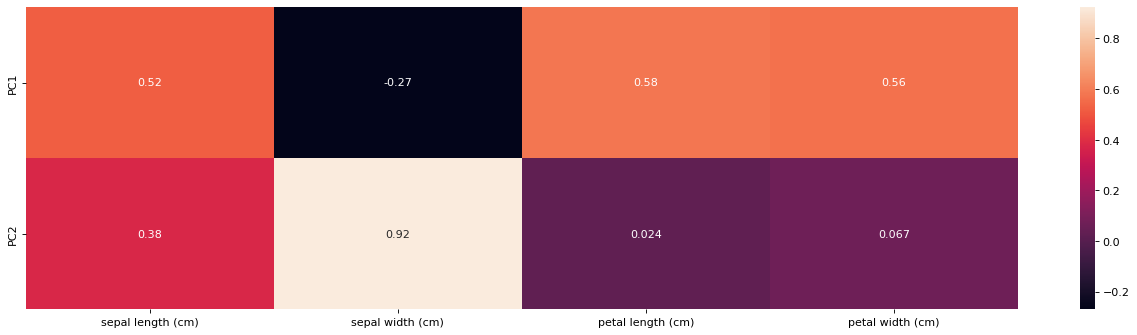

In [75]:
plt.figure(figsize=(20,5),dpi=80)
sns.heatmap(PCA_df_comp,annot=True)

# Step22: Calculating the Explained Variance by the Component

In [76]:
PCA_model.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [77]:
np.sum(PCA_model.explained_variance_ratio_)

0.9581320720000164

In [78]:
#for all component
pca_4 = PCA(n_components=4)
pca_4.fit(scaled_X)

PCA(n_components=4)

In [79]:
pca_4.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [80]:
np.sum(pca_4.explained_variance_ratio_)

0.9999999999999999

# Choosing n-components

In [81]:
explained_variance = []

for n in range(1,5):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

## 🟣 Plot--> Number of Components, Variance Explained

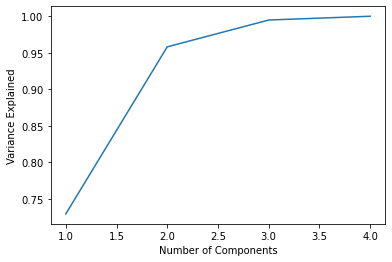

In [82]:
plt.plot(range(1,5),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");